In [ ]:
import pickle
from os import walk
import pandas as pd
from sklearn import model_selection, naive_bayes, svm, ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
files = []
mypath = '/content/drive/MyDrive/data/bertEmbeddingsBalanced'
for (dirpath, dirnames, filenames) in walk(mypath):
    files = filenames
    break

In [ ]:
train_x = []
train_y = []
val_y = []
val_x = []

In [ ]:
files
for file in files:
  if(file.find("train") != -1):
    print("Loading train "+file)
    x = pickle.load(open(mypath+'/'+file, "rb"))
    train_x.extend(x['embeddings'])
  elif(file.find("val") != -1):
    print("Loading val "+file)
    x = pickle.load(open(mypath+'/'+file, "rb"))
    val_x.extend(x['embeddings'])
  elif(file.find("labels") != -1):
    print("Loading labels "+file)
    labels = pickle.load(open(mypath+'/'+file, "rb"))
    train_y = labels['train_labels']
    val_y = labels['val_labels']


Loading train train_0_16384.p
Loading train train_16384_32768.p
Loading train train_32768_49152.p
Loading train train_49152_65536.p
Loading train train_65536_81920.p
Loading train train_81920_98304.p
Loading train train_98304_114688.p
Loading train train_114688_131072.p
Loading train train_131072_147456.p
Loading train train_147456_163840.p
Loading labels labels.p
Loading train train_163840_180224.p
Loading train train_180224_196608.p
Loading train train_196609_210001.p
Loading val val_0_16384.p
Loading val val_16384_32768.p
Loading val val_32768_49152.p
Loading val val_49152_65536.p
Loading val val_65536_81920.p
Loading val val_81920_90001.p


209991
89995
768
768
209991
89995
0
0

In [ ]:
print(len(train_x))
print(len(val_x))
print(len(train_x[0]))
print(len(val_x[0]))
print(len(train_y))
print(len(val_y))
print(train_y[0])
print(val_y[0])

209991
89995
768
768
209991
89995
0
0


In [ ]:
pickle_obj = {'train_x':train_x, 'train_y':train_y, 'val_x':val_x, 'val_y':val_y}
pickle.dump(pickle_obj, open('/content/drive/MyDrive/data/bertEmbeddingsBalanced/train_val_labels.p', "wb"))

In [ ]:
directory_path = '/content/drive/MyDrive/models/balanced_dataset'

In [ ]:
#svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_x,train_y)
pickle.dump(SVM, open(directory_path+'/svm_bert.p', 'wb'))

predictions_SVM = SVM.predict(val_x)

classification_reportSVM = classification_report(val_y, predictions_SVM)
print(classification_reportSVM)
confusion_matrixSVM = confusion_matrix(val_y, predictions_SVM)
#print(confusion_matrixSVM)


ax = plt.subplot()
sns.heatmap(confusion_matrixSVM, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

In [ ]:
embeddings = []
embeddings.extend(train_x)
embeddings.extend(val_x)
scaler = MinMaxScaler()
scaler.fit(embeddings)
scaled_train_x = scaler.transform(train_x)
scaled_val_x = scaler.transform(val_x)

              precision    recall  f1-score   support

           0       0.47      0.59      0.52     29995
           1       0.42      0.52      0.47     30000
           2       0.34      0.18      0.24     30000

    accuracy                           0.43     89995
   macro avg       0.41      0.43      0.41     89995
weighted avg       0.41      0.43      0.41     89995



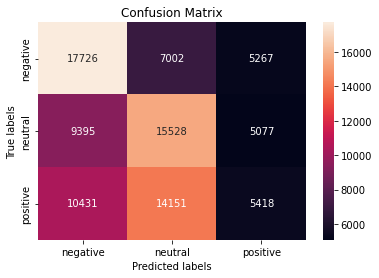

In [ ]:
#naive bayes

bayes = naive_bayes.MultinomialNB()
bayes.fit(scaled_train_x,train_y)
pickle.dump(bayes, open(directory_path+'/bayes_bert.p', 'wb'))

predictions_NB = bayes.predict(scaled_val_x)

classification_reportNB = classification_report(val_y, predictions_NB)
print(classification_reportNB)
confusion_matrixNB = confusion_matrix(val_y, predictions_NB)
#print(confusion_matrixNB)

ax = plt.subplot()
sns.heatmap(confusion_matrixNB, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

              precision    recall  f1-score   support

           0       0.51      0.64      0.57     29995
           1       0.44      0.42      0.43     30000
           2       0.40      0.31      0.35     30000

    accuracy                           0.46     89995
   macro avg       0.45      0.46      0.45     89995
weighted avg       0.45      0.46      0.45     89995



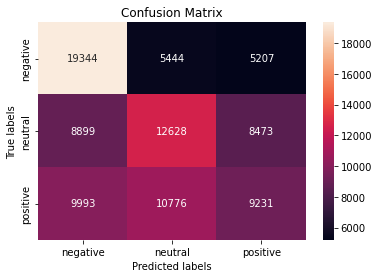

In [ ]:
#random forest

random_forest = ensemble.RandomForestClassifier()
random_forest.fit(train_x,train_y)
pickle.dump(random_forest, open(directory_path+'/random_forest_bert.p', 'wb'))

predictions_RF = random_forest.predict(val_x)

classification_reportRF = classification_report(val_y, predictions_RF)
print(classification_reportRF)
confusion_matrixRF = confusion_matrix(val_y, predictions_RF)
#print(confusion_matrixRF)

ax = plt.subplot()
sns.heatmap(confusion_matrixRF, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);